Import all packages and read the dataset:

In [1]:
#import all the packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import label_binarize 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,roc_auc_score 
import sklearn.metrics 
import statsmodels.api as sm 
import plotly.express as px #for plotting the scatter plot 
import seaborn as sns #For plotting the dataset in seaborn sns.set(style='whitegrid') 
import warnings 
warnings.filterwarnings('ignore')

# Read dataset

data=pd.read_csv('penguins_Iter.csv')
data.columns = data.columns.str.casefold()
data.head(5)

,studyname,sample number,species,region,island,stage,individual id,clutch completion,date egg,culmen length (mm),culmen depth (mm),flipper length (mm),body mass (g),sex,delta 15 n (o/oo),delta 13 c (o/oo),comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [2]:
# checking missing values
data.isnull().sum()

studyname                0
sample number            0
species                  0
region                   0
island                   0
stage                    0
individual id            0
clutch completion        0
date egg                 0
culmen length (mm)       2
culmen depth (mm)        2
flipper length (mm)      2
body mass (g)            2
sex                     10
delta 15 n (o/oo)       14
delta 13 c (o/oo)       13
comments               318
dtype: int64

In [3]:
#Check info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyname            344 non-null    object 
 1   sample number        344 non-null    int64  
 2   species              344 non-null    object 
 3   region               344 non-null    object 
 4   island               344 non-null    object 
 5   stage                344 non-null    object 
 6   individual id        344 non-null    object 
 7   clutch completion    344 non-null    object 
 8   date egg             344 non-null    object 
 9   culmen length (mm)   342 non-null    float64
 10  culmen depth (mm)    342 non-null    float64
 11  flipper length (mm)  342 non-null    float64
 12  body mass (g)        342 non-null    float64
 13  sex                  334 non-null    object 
 14  delta 15 n (o/oo)    330 non-null    float64
 15  delta 13 c (o/oo)    331 non-null    flo

In [4]:
# Drop some columns that will not be used for classified gender and species.
numeric = ['species','island','culmen length (mm)', 'culmen depth (mm)', 'flipper length (mm)', 'body mass (g)','sex']
df = data[numeric].dropna()
df.head()

,species,island,culmen length (mm),culmen depth (mm),flipper length (mm),body mass (g),sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.3,20.6,190.0,3650.0,MALE


In [5]:
# checking missing values
df.isnull().sum()

species                0
island                 0
culmen length (mm)     0
culmen depth (mm)      0
flipper length (mm)    0
body mass (g)          0
sex                    0
dtype: int64

# Generate numeric labels for the columns "species", "island" and "sex".

In [6]:
dataset = [df]

#### Island columns

In [7]:
df.island.value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [8]:
# Making mapping for island columns and set to numeric labels
island_mapping = {"Biscoe": 0, "Dream": 1, "Torgersen": 2}

for _data in dataset:
    _data['island'] = _data['island'].map(island_mapping).astype(float)
    
df.head(4)

,species,island,culmen length (mm),culmen depth (mm),flipper length (mm),body mass (g),sex
0,Adelie Penguin (Pygoscelis adeliae),2.0,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),2.0,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),2.0,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),2.0,36.7,19.3,193.0,3450.0,FEMALE


Species

In [9]:
df.species.value_counts()

Adelie Penguin (Pygoscelis adeliae)          146
Gentoo penguin (Pygoscelis papua)            120
Chinstrap penguin (Pygoscelis antarctica)     68
Name: species, dtype: int64

In [10]:
# Making mapping for species columns and set to numeric labels
species_mapping = {"Adelie Penguin (Pygoscelis adeliae)": 0, "Gentoo penguin (Pygoscelis papua)": 1, "Chinstrap penguin (Pygoscelis antarctica)": 2}

for _data in dataset:
    _data['species'] = _data['species'].map(species_mapping).astype(float)
    
df

,species,island,culmen length (mm),culmen depth (mm),flipper length (mm),body mass (g),sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,MALE
1,0.0,2.0,39.5,17.4,186.0,3800.0,FEMALE
2,0.0,2.0,40.3,18.0,195.0,3250.0,FEMALE
4,0.0,2.0,36.7,19.3,193.0,3450.0,FEMALE
5,0.0,2.0,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,1.0,0.0,47.2,13.7,214.0,4925.0,FEMALE
340,1.0,0.0,46.8,14.3,215.0,4850.0,FEMALE
341,1.0,0.0,50.4,15.7,222.0,5750.0,MALE
342,1.0,0.0,45.2,14.8,212.0,5200.0,FEMALE


Sex

In [11]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

Because data gender has a missing value, we drop (.). Then, we can use this code:

In [12]:
df['sex'].replace('.', np.nan, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

species                0
island                 0
culmen length (mm)     0
culmen depth (mm)      0
flipper length (mm)    0
body mass (g)          0
sex                    0
dtype: int64

In [13]:
df.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [14]:
# Making mapping for sex columns and set to numeric labels
sex_mapping = {"MALE": 0, "FEMALE": 1}

for _data in dataset:
    _data['sex'] = _data['sex'].map(sex_mapping).astype(float)
df.head()

,species,island,culmen length (mm),culmen depth (mm),flipper length (mm),body mass (g),sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,0.0
1,0.0,2.0,39.5,17.4,186.0,3800.0,1.0
2,0.0,2.0,40.3,18.0,195.0,3250.0,1.0
4,0.0,2.0,36.7,19.3,193.0,3450.0,1.0
5,0.0,2.0,39.3,20.6,190.0,3650.0,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   species              333 non-null    float64
 1   island               333 non-null    float64
 2   culmen length (mm)   333 non-null    float64
 3   culmen depth (mm)    333 non-null    float64
 4   flipper length (mm)  333 non-null    float64
 5   body mass (g)        333 non-null    float64
 6   sex                  333 non-null    float64
dtypes: float64(7)
memory usage: 20.8 KB


In [16]:
df.shape

(333, 7)

# Point 2

Divide the data set into training set and test set and compare the classifier with the test set

In [17]:
#Splitting into testing and training data
X=df.drop('sex', axis=1)# since these are the features we take them as x
y=df['sex']# since sex is the output or label we'll take it as y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=1) # our test set is 40%
print("\nShape of x_train:\n{}".format(X_train.shape))
print("\nShape of x_test:\n{}".format(X_test.shape))
print("\nShape of y_train:\n{}".format(y_train.shape))
print("\nShape of y_test:\n{}".format(y_test.shape))


Shape of x_train:
(199, 6)

Shape of x_test:
(134, 6)

Shape of y_train:
(199,)

Shape of y_test:
(134,)


Standarizing feature variables for optimal.

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train = sc.fit_transform(X_train)
scaled_x_test = sc.transform(X_test)
print(X_train)
print("____________________________________________________________________________")
print("",scaled_x_train)

     species  island  culmen length (mm)  culmen depth (mm)  \
210      2.0     1.0                50.2               18.8   
178      2.0     1.0                50.5               18.4   
203      2.0     1.0                51.4               19.0   
114      0.0     0.0                39.6               20.7   
299      1.0     0.0                45.2               16.4   
..       ...     ...                 ...                ...   
209      2.0     1.0                49.3               19.9   
262      1.0     0.0                45.3               13.7   
78       0.0     2.0                36.2               16.1   
241      1.0     0.0                45.1               14.5   
42       0.0     1.0                36.0               18.5   

     flipper length (mm)  body mass (g)  
210                202.0         3800.0  
178                200.0         3400.0  
203                201.0         3950.0  
114                191.0         3900.0  
299                223.0         

In [19]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
X_train=scaled_x_train
X_test=scaled_x_test
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train, y_train)
y_prediction1= model1.predict(X_test)

report=pd.DataFrame()
report['Actual values']=y_test
report['Predicted values KNN']= y_prediction1
print(report)

     Actual values  Predicted values KNN
65             0.0                   0.0
276            1.0                   1.0
186            0.0                   0.0
198            1.0                   0.0
293            1.0                   0.0
..             ...                   ...
185            0.0                   0.0
320            1.0                   1.0
24             0.0                   1.0
214            1.0                   1.0
50             1.0                   1.0

[134 rows x 2 columns]


In [20]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_prediction1)
print("Accuracy:",accuracy)
print("F1-score: ",metrics.f1_score(y_test, y_prediction1, 
                                           pos_label='positive',
                                           average='micro'))

Accuracy: 0.9029850746268657
F1-score:  0.9029850746268657


# Point 3

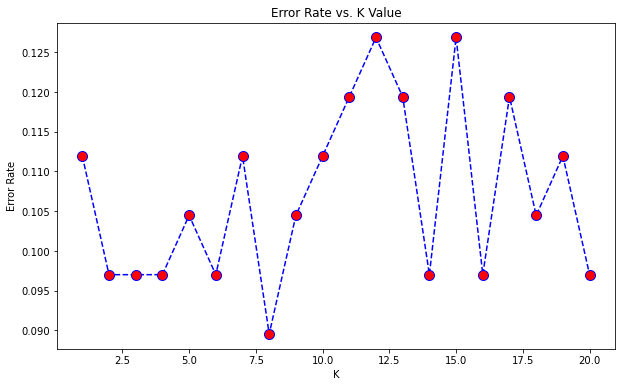

In [21]:
#Selecting an optimal K value using Elbow Method

error_rate = []

# Will take some time
for i in range(1,21):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

From this graph, it clearly illustrates that a good value of n_neighbors is 8 point. Below, we can check the accuracy for n_neighbors for 8 point.

In [22]:
# Point 3

optimal_neighbors = {}

for x in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=x).fit(X_train, y_train)
    optimal_neighbors[knn.score(X_test, y_test)] = x

print(optimal_neighbors)
print("The optimal value for n_neighbors in the penguin gender classifier\nk:", optimal_neighbors.get(max(optimal_neighbors)), "\nAccuracy:", max(optimal_neighbors))



{0.8880597014925373: 19, 0.9029850746268657: 20, 0.8955223880597015: 18, 0.9104477611940298: 8, 0.8805970149253731: 17, 0.8731343283582089: 15}
The optimal value for n_neighbors in the penguin gender classifier
k: 8 
Accuracy: 0.9104477611940298


# Point 4

In [23]:
#Splitting into testing and training data
X=df.drop('species', axis=1)# since these are the features we take them as x
y=df['species']# since species is the output or label we'll take it as y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=1) # our test set is 40%
print("\nShape of x_train:\n{}".format(X_train.shape))
print("\nShape of x_test:\n{}".format(X_test.shape))
print("\nShape of y_train:\n{}".format(y_train.shape))
print("\nShape of y_test:\n{}".format(y_test.shape))


Shape of x_train:
(199, 6)

Shape of x_test:
(134, 6)

Shape of y_train:
(199,)

Shape of y_test:
(134,)


Standarizing feature variables

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train = sc.fit_transform(X_train)
scaled_x_test = sc.transform(X_test)
print(X_train)
print("____________________________________________________________________________")
print("",scaled_x_train)

     island  culmen length (mm)  culmen depth (mm)  flipper length (mm)  \
210     1.0                50.2               18.8                202.0   
178     1.0                50.5               18.4                200.0   
203     1.0                51.4               19.0                201.0   
114     0.0                39.6               20.7                191.0   
299     0.0                45.2               16.4                223.0   
..      ...                 ...                ...                  ...   
209     1.0                49.3               19.9                203.0   
262     0.0                45.3               13.7                210.0   
78      2.0                36.2               16.1                187.0   
241     0.0                45.1               14.5                215.0   
42      1.0                36.0               18.5                186.0   

     body mass (g)  sex  
210         3800.0  0.0  
178         3400.0  1.0  
203         3950.0  0

In [25]:
#Selecting an optimal K value using Elbow Method

error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

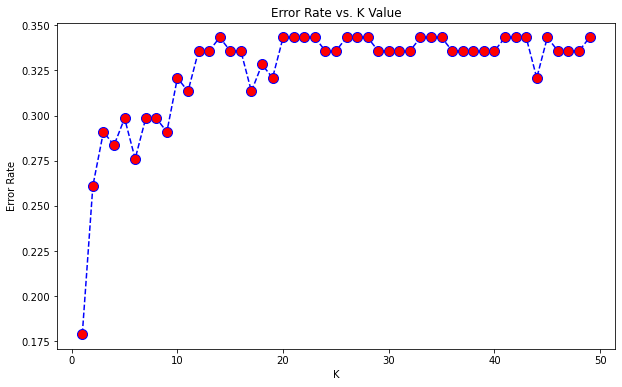

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

From this graph, it clearly illustrates that a good value of n_neighbors is 1 point. Below, we can check the accuracy for 1 point.

In [27]:
optimal_neighbors = {}

for x in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=x).fit(X_train, y_train)
    optimal_neighbors[knn.score(X_test, y_test)] = x

print("The optimal value for n_neighbors in the penguin species classifier\nk:", optimal_neighbors.get(max(optimal_neighbors)), "\nAccuracy:", max(optimal_neighbors))

The optimal value for n_neighbors in the penguin species classifier
k: 1 
Accuracy: 0.8208955223880597


Dandy Wibowo (334541)